# Alineamiento de diferentes secuencias de un mismo locus con Biopython
## se utilizará el archivo anotado en la bitácora 04_blast_secuencias.ipynb

In [1]:
import os, pylab
from Bio.Align.Applications import ClustalwCommandline
from Bio import pairwise2, SeqIO, AlignIO, Phylo


In [2]:
pwd

'/home/user1/Desktop/jupyter'

In [3]:
cd ../data/fasta/

/home/user1/Desktop/data/fasta


In [4]:
# visualización de los nombres de las secuencias

f= open("secuencias_anotadas.fasta")
n=0
secuencias=[]
for rec in SeqIO.parse(f, "fasta"):
    print (rec.id, "\t", rec.description)

Nav1_2_B_halotolerans 	 Nav1_2_B_halotolerans Bacillus halotolerans
Nav1_8_B_aquimaris 	 Nav1_8_B_aquimaris Bacillus aquimaris
Nav2_2_A_mediterranea 	 Nav2_2_A_mediterranea Alteromonas mediterranea
PET1_2_H_chejuensis 	 PET1_2_H_chejuensis Hahella chejuensis
PET1_8_P_oceani 	 PET1_8_P_oceani Pseudomonas oceani
PET2_2_A_mediterranea 	 PET2_2_A_mediterranea Alteromonas mediterranea
PET2_8_A_mediterranea 	 PET2_8_A_mediterranea Alteromonas mediterranea
PETsn1_2_A_mediterranea 	 PETsn1_2_A_mediterranea Alteromonas mediterranea
PETsn1_8_A_mediterranea 	 PETsn1_8_A_mediterranea Alteromonas mediterranea
PHBb1_2_L_janthinus 	 PHBb1_2_L_janthinus Litoreibacter janthinus


# Alineamiento

In [5]:
# es necesario saber en qué directorio se localiza el programa clustalw2 que se instaló con conda
# en este caso se encuentra en /home/jupyter/miniconda3/bin/clustalw2
clustalw_exe = r"/home/jupyter/miniconda3/bin/clustalw2"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile="secuencias_anotadas.fasta")
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
stdout, stderr = clustalw_cline()

#### Se verifica la presencia de los archivos .aln y .dnd

In [6]:
ls 

blastn_secuencias.txt  secuencias.tab           secuencias_anotadas.fasta
img/                   secuencias_anotadas.aln  secuencias_especies.csv
secuencias.fasta       secuencias_anotadas.dnd


In [7]:
# para visualizar el alineamiento se ve el contenido del archivo .aln
alignments = AlignIO.parse("secuencias_anotadas.aln", "clustal")
for alignment in alignments:
    print(alignment)
    print("")

SingleLetterAlphabet() alignment with 10 rows and 334 columns
GACGTCAAGTCATCATGGCCCTTACGTGTAGGGCTACACACGTG...CCT PET2_2_A_mediterranea
GACGTCAAGTCATCATGGCCCTTACGTGTAGGGCTACACACGTG...CCT PETsn1_2_A_mediterranea
GACGTCAAGTCATCATGGCCCTTACGTGTAGGGCTACACACGTG...CCT Nav2_2_A_mediterranea
GACGTCAAGTCATCATGGCCCTTACGTGTAGGGCTACACACGTG...CCT PET2_8_A_mediterranea
GACGTCAAGTCATCATGGCCCTTACGTGTAGGGCTACACACGTG...CCT PETsn1_8_A_mediterranea
GACGTCAAGTCATCATGGCCCTTACGGCCAGGGCTACACACGTG...CCT PET1_2_H_chejuensis
GACGTCAAGTCATCATGGCCCTTACGGCCAGGGCTACACACGTG...CCT PET1_8_P_oceani
GACGTCAAGTCCTCATGGCCCTTACGGGTTGGGCTACACACGTG...CCT PHBb1_2_L_janthinus
GACGTCAAATCATCATGCCCCTTATGACCTGGGGTACACACGTG...GGT Nav1_2_B_halotolerans
GACGTCAAATCATCATGCCCCTTATGACTTGGGCTACACACGTG...GGT Nav1_8_B_aquimaris



In [8]:
# para visualizar el árbol generado en formato ascii, se ve el contenido del archivo .dnd
tree = Phylo.read("secuencias_anotadas.dnd", "newick")
Phylo.draw_ascii(tree, file=None, column_width=80)

                                          ___________ Nav1_2_B_halotolerans
                        _________________|
                _______|                 |___ Nav1_8_B_aquimaris
               |       |
  _____________|       |__________ PHBb1_2_L_janthinus
 |             |
 |             |    ___ PET1_2_H_chejuensis
 |             |___|
 |                 |__ PET1_8_P_oceani
 |
 , PET2_8_A_mediterranea
 |
 | PETsn1_8_A_mediterranea
 |
_| Nav2_2_A_mediterranea
 |
 | PET2_2_A_mediterranea
 |
 | PETsn1_2_A_mediterranea



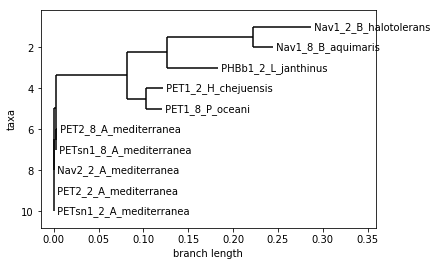

In [9]:
# La visualización del arbol en formato 
tree.rooted = True
Phylo.draw(tree)

### En caso de observar un mensaje parecido a 
`<Figure size 640x480 with 1 Axes>`
### es necesario ejecutar de nuevo la celda

# Escriba qué es lo que aprendió en esta bitácora y en qué le podría ayudar en su trabajo, sea tan explícito como le sea posible